In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from dataset import create_image_path_ds, preprocess_image
from Resnet50 import ResNet50

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
IMG_SIZE = 96

In [4]:
@tf.keras.saving.register_keras_serializable()
class L1Dist(layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
    def call(self, anchor_embedding, validation_embedding):
        return tf.math.abs(anchor_embedding - validation_embedding)

In [6]:
model = tf.keras.models.load_model('./drive/MyDrive/demo/siamese_lfw.keras')

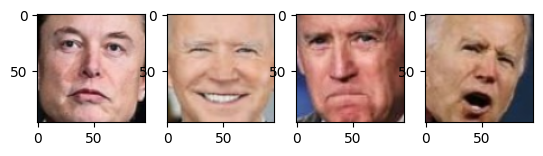

1/1 [==============================] - 3s 3s/step
(1,2),[[0.9294273]]
1/1 [==============================] - 0s 180ms/step
(1,3),[[0.9938743]]
1/1 [==============================] - 0s 170ms/step
(1,4),[[0.9820274]]
1/1 [==============================] - 0s 165ms/step
(2,3),[[0.00016731]]
1/1 [==============================] - 0s 186ms/step
(2,4),[[3.998564e-05]]
1/1 [==============================] - 0s 118ms/step
(3,4),[[0.00243093]]


In [7]:
img_a = preprocess_image('elon1.jpg',(IMG_SIZE, IMG_SIZE))
img_b = preprocess_image('joe1.jpg',(IMG_SIZE, IMG_SIZE))
img_c = preprocess_image('joe2.jpg',(IMG_SIZE, IMG_SIZE))
img_d = preprocess_image('joe3.jpg',(IMG_SIZE, IMG_SIZE))


i_a = np.expand_dims(img_a, axis=0)
i_b = np.expand_dims(img_b, axis=0)
i_c = np.expand_dims(img_c, axis=0)
i_d = np.expand_dims(img_d, axis=0)

plt.subplot(1,4,1)
plt.imshow(img_a)
plt.subplot(1,4,2)
plt.imshow(img_b)
plt.subplot(1,4,3)
plt.imshow(img_c)
plt.subplot(1,4,4)
plt.imshow(img_d)
plt.show()


print(f'(1,2),{model.predict([i_a, i_b])}')
print(f'(1,3),{model.predict([i_a, i_c])}')
print(f'(1,4),{model.predict([i_a, i_d])}')
print(f'(2,3),{model.predict([i_b, i_c])}')
print(f'(2,4),{model.predict([i_b, i_d])}')
print(f'(3,4),{model.predict([i_c, i_d])}')